# Tutorial 71: Time Curves

This example demonstrates how to obtain necessary data and plot time curves.

# SIR 3S Installation

In [1]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S\SirGraf-90-15-00-22_Quebec-Upd2" #change to local path

# Imports

In [2]:
from sir3stoolkit.core import wrapper

In [3]:
from sir3stoolkit.mantle import mantle

The wrapper package has to be initialized with reference to a SIR 3S (SirGraf) installation.

In [4]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

## Additional imports

In [5]:
import os

In [6]:
import pandas as pd

...

# Initialization

In [7]:
s3s = mantle.SIR3S_Model_Mantle()

Initialization complete


# Open Model

In [8]:
dbFilePath=r"Toolkit_Tutorial71_Model.db3"

In [9]:
s3s.OpenModel(dbName=dbFilePath,
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Model is open for further operation


# Calculate Model

In [10]:
#s3s.ExecCalculation(True)

# Obtain Data

In [11]:
object_types = [item for item in dir(s3s.ObjectTypes) if not (item.startswith('__') and item.endswith('__'))]
print(object_types)

['AGSN_HydraulicProfile', 'AirVessel', 'Arrow', 'Atmosphere', 'BlockConnectionNode', 'CalcPari', 'CharacteristicLossTable', 'CharacteristicLossTable_Row', 'Circle', 'Compressor', 'CompressorTable', 'CompressorTable_Row', 'ControlEngineeringNexus', 'ControlMode', 'ControlPointTable', 'ControlPointTable_Row', 'ControlValve', 'ControlVariableConverter', 'ControlVariableConverterRSTE', 'CrossSectionTable', 'CrossSectionTable_Row', 'DPGR_DPKT_DatapointDpgrConnection', 'DPGR_DataPointGroup', 'DPKT_Datapoint', 'DamageRatesTable', 'DamageRatesTable_Row', 'DeadTimeElement', 'Demand', 'DifferentialRegulator', 'DirectionalArrow', 'DistrictHeatingConsumer', 'DistrictHeatingFeeder', 'Divider', 'DriveEfficiencyTable', 'DriveEfficiencyTable_Row', 'DrivePowerTable', 'DrivePowerTable_Row', 'EBES_FeederGroups', 'EfficiencyConverterTable', 'EfficiencyConverterTable_Row', 'ElementQuery', 'EnergyRecoveryTable', 'EnergyRecoveryTable_Row', 'EnvironmentTemp', 'FWBZ_DistrictHeatingReferenceValues', 'FlapValve'

## Nodes

In [12]:
nodes_tks = ["5471942051669438823", "5166327497394449628", "5667818255300782920", "5262999985134416180"]

In [13]:
df_nodes_results = s3s.generate_element_results_dataframe(element_type=s3s.ObjectTypes.Node
                                                          ,tks=nodes_tks
                                                          ,properties=["PH"]
                                                          ,timestamps=None # all available simulation timestamps will be used
                                                          )

[2026-02-12 18:04:53,201] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.Node
[2026-02-12 18:04:53,202] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()[0]).
[2026-02-12 18:04:53,490] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 simulation timestamp(s) are available.
[2026-02-12 18:04:53,684] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 valid timestamp(s) will be used.
[2026-02-12 18:04:53,698] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 635 element(s) of element type ObjectTypes.Node.
[2026-02-12 18:04:53,700] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] 4 tks remain after filtering for given tks.
[2026-02-12 18:04:53,735] INFO in sir3stoolkit.mantle.dataframes: [results] Using 1 result properties.
[2026-02-12 18:04:54,022] INFO in sir3stoo

## Vents

In [14]:
vent_tks = ["5303247238968995258"]

In [15]:
df_vent_results = s3s.generate_element_results_dataframe(element_type=s3s.ObjectTypes.FlapValve
                                                          ,tks=vent_tks
                                                          ,properties=["PHI", "QM"]
                                                          ,timestamps=None # all available simulation timestamps will be used
                                                          )

[2026-02-12 18:04:58,159] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.FlapValve
[2026-02-12 18:04:58,160] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()[0]).
[2026-02-12 18:04:58,302] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 simulation timestamp(s) are available.
[2026-02-12 18:04:58,441] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 valid timestamp(s) will be used.
[2026-02-12 18:04:58,443] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 4 element(s) of element type ObjectTypes.FlapValve.
[2026-02-12 18:04:58,444] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] 1 tks remain after filtering for given tks.
[2026-02-12 18:04:58,448] INFO in sir3stoolkit.mantle.dataframes: [results] Using 2 result properties.
[2026-02-12 18:04:59,196] INFO in 

In [16]:
df_vent_results.head(3)

tk                                                                    5303247238968995258  \
name                                                                   Klappe K0013 K0014   
end_nodes                      ('5154852831768145370', '5018980228933582263', '-1', '-1')   
property                                                                              PHI   
timestamp                                                                                   
2020-01-28 15:45:01.000 +01:00                                           56.41736           
2020-01-28 15:45:01.100 +01:00                                           56.40917           
2020-01-28 15:45:01.200 +01:00                                           56.40861           

tk                                        
name                                      
end_nodes                                 
property                              QM  
timestamp                                 
2020-01-28 15:45:01.000 +01:00  18.35320  
2020-01-28 15:45:01.100 +01:00  18.35296  
2020-01-28 15:45:01.200 +01:00  18.35280

## Valves

In [17]:
valves_tks = ["5430537691154258843"]

In [18]:
df_valves_results = s3s.generate_element_results_dataframe(element_type=s3s.ObjectTypes.Valve
                                                          ,tks=valves_tks
                                                          ,properties=["QM"]
                                                          ,timestamps=None # all available simulation timestamps will be used
                                                          )

[2026-02-12 18:05:01,858] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.Valve
[2026-02-12 18:05:01,861] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()[0]).
[2026-02-12 18:05:01,973] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 simulation timestamp(s) are available.
[2026-02-12 18:05:02,106] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 valid timestamp(s) will be used.
[2026-02-12 18:05:02,106] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 9 element(s) of element type ObjectTypes.Valve.
[2026-02-12 18:05:02,106] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] 1 tks remain after filtering for given tks.
[2026-02-12 18:05:02,111] INFO in sir3stoolkit.mantle.dataframes: [results] Using 1 result properties.
[2026-02-12 18:05:02,151] INFO in sir3stoo

In [19]:
df_valves_results.head(3)

tk,5430537691154258843
name,Ventil K0011 PST_out
end_nodes,"('5471942051669438823', '5355079936656060238', '-1', '-1')"
property,QM
timestamp,
2020-01-28 15:45:01.000 +01:00,36.70272
2020-01-28 15:45:01.100 +01:00,36.70224
2020-01-28 15:45:01.200 +01:00,36.70192


## Concat

In [20]:
df_results = pd.concat([df_nodes_results, df_vent_results, df_valves_results], axis=1, join="inner")

In [21]:
df_results.head(3)

tk                                      5471942051669438823  \
name                                                  K0011   
end_nodes                      No end nodes on element type   
property                                                 PH   
timestamp                                                     
2020-01-28 15:45:01.000 +01:00                     10.59964   
2020-01-28 15:45:01.100 +01:00                     10.59981   
2020-01-28 15:45:01.200 +01:00                     10.59993   

tk                                      5166327497394449628  \
name                                              5143521_i   
end_nodes                      No end nodes on element type   
property                                                 PH   
timestamp                                                     
2020-01-28 15:45:01.000 +01:00                     8.320659   
2020-01-28 15:45:01.100 +01:00                     8.320658   
2020-01-28 15:45:01.200 +01:00                     8.320656   

tk                                      5667818255300782920  \
name                                             791393_3_k   
end_nodes                      No end nodes on element type   
property                                                 PH   
timestamp                                                     
2020-01-28 15:45:01.000 +01:00                     6.477164   
2020-01-28 15:45:01.100 +01:00                     6.477123   
2020-01-28 15:45:01.200 +01:00                     6.477080   

tk                                      5262999985134416180  \
name                                            1629686_0_i   
end_nodes                      No end nodes on element type   
property                                                 PH   
timestamp                                                     
2020-01-28 15:45:01.000 +01:00                     0.881641   
2020-01-28 15:45:01.100 +01:00                     0.881641   
2020-01-28 15:45:01.200 +01:00                     0.881639   

tk                                                                    5303247238968995258  \
name                                                                   Klappe K0013 K0014   
end_nodes                      ('5154852831768145370', '5018980228933582263', '-1', '-1')   
property                                                                              PHI   
timestamp                                                                                   
2020-01-28 15:45:01.000 +01:00                                           56.41736           
2020-01-28 15:45:01.100 +01:00                                           56.40917           
2020-01-28 15:45:01.200 +01:00                                           56.40861           

tk                                        \
name                                       
end_nodes                                  
property                              QM   
timestamp                                  
2020-01-28 15:45:01.000 +01:00  18.35320   
2020-01-28 15:45:01.100 +01:00  18.35296   
2020-01-28 15:45:01.200 +01:00  18.35280   

tk                                                                    5430537691154258843  
name                                                                 Ventil K0011 PST_out  
end_nodes                      ('5471942051669438823', '5355079936656060238', '-1', '-1')  
property                                                                               QM  
timestamp                                                                                  
2020-01-28 15:45:01.000 +01:00                                           36.70272          
2020-01-28 15:45:01.100 +01:00                                           36.70224          
2020-01-28 15:45:01.200 +01:00                                           36.70192

# Plot

In [22]:
df_results.head(3)

tk                                      5471942051669438823  \
name                                                  K0011   
end_nodes                      No end nodes on element type   
property                                                 PH   
timestamp                                                     
2020-01-28 15:45:01.000 +01:00                     10.59964   
2020-01-28 15:45:01.100 +01:00                     10.59981   
2020-01-28 15:45:01.200 +01:00                     10.59993   

tk                                      5166327497394449628  \
name                                              5143521_i   
end_nodes                      No end nodes on element type   
property                                                 PH   
timestamp                                                     
2020-01-28 15:45:01.000 +01:00                     8.320659   
2020-01-28 15:45:01.100 +01:00                     8.320658   
2020-01-28 15:45:01.200 +01:00                     8.320656   

tk                                      5667818255300782920  \
name                                             791393_3_k   
end_nodes                      No end nodes on element type   
property                                                 PH   
timestamp                                                     
2020-01-28 15:45:01.000 +01:00                     6.477164   
2020-01-28 15:45:01.100 +01:00                     6.477123   
2020-01-28 15:45:01.200 +01:00                     6.477080   

tk                                      5262999985134416180  \
name                                            1629686_0_i   
end_nodes                      No end nodes on element type   
property                                                 PH   
timestamp                                                     
2020-01-28 15:45:01.000 +01:00                     0.881641   
2020-01-28 15:45:01.100 +01:00                     0.881641   
2020-01-28 15:45:01.200 +01:00                     0.881639   

tk                                                                    5303247238968995258  \
name                                                                   Klappe K0013 K0014   
end_nodes                      ('5154852831768145370', '5018980228933582263', '-1', '-1')   
property                                                                              PHI   
timestamp                                                                                   
2020-01-28 15:45:01.000 +01:00                                           56.41736           
2020-01-28 15:45:01.100 +01:00                                           56.40917           
2020-01-28 15:45:01.200 +01:00                                           56.40861           

tk                                        \
name                                       
end_nodes                                  
property                              QM   
timestamp                                  
2020-01-28 15:45:01.000 +01:00  18.35320   
2020-01-28 15:45:01.100 +01:00  18.35296   
2020-01-28 15:45:01.200 +01:00  18.35280   

tk                                                                    5430537691154258843  
name                                                                 Ventil K0011 PST_out  
end_nodes                      ('5471942051669438823', '5355079936656060238', '-1', '-1')  
property                                                                               QM  
timestamp                                                                                  
2020-01-28 15:45:01.000 +01:00                                           36.70272          
2020-01-28 15:45:01.100 +01:00                                           36.70224          
2020-01-28 15:45:01.200 +01:00                                           36.70192

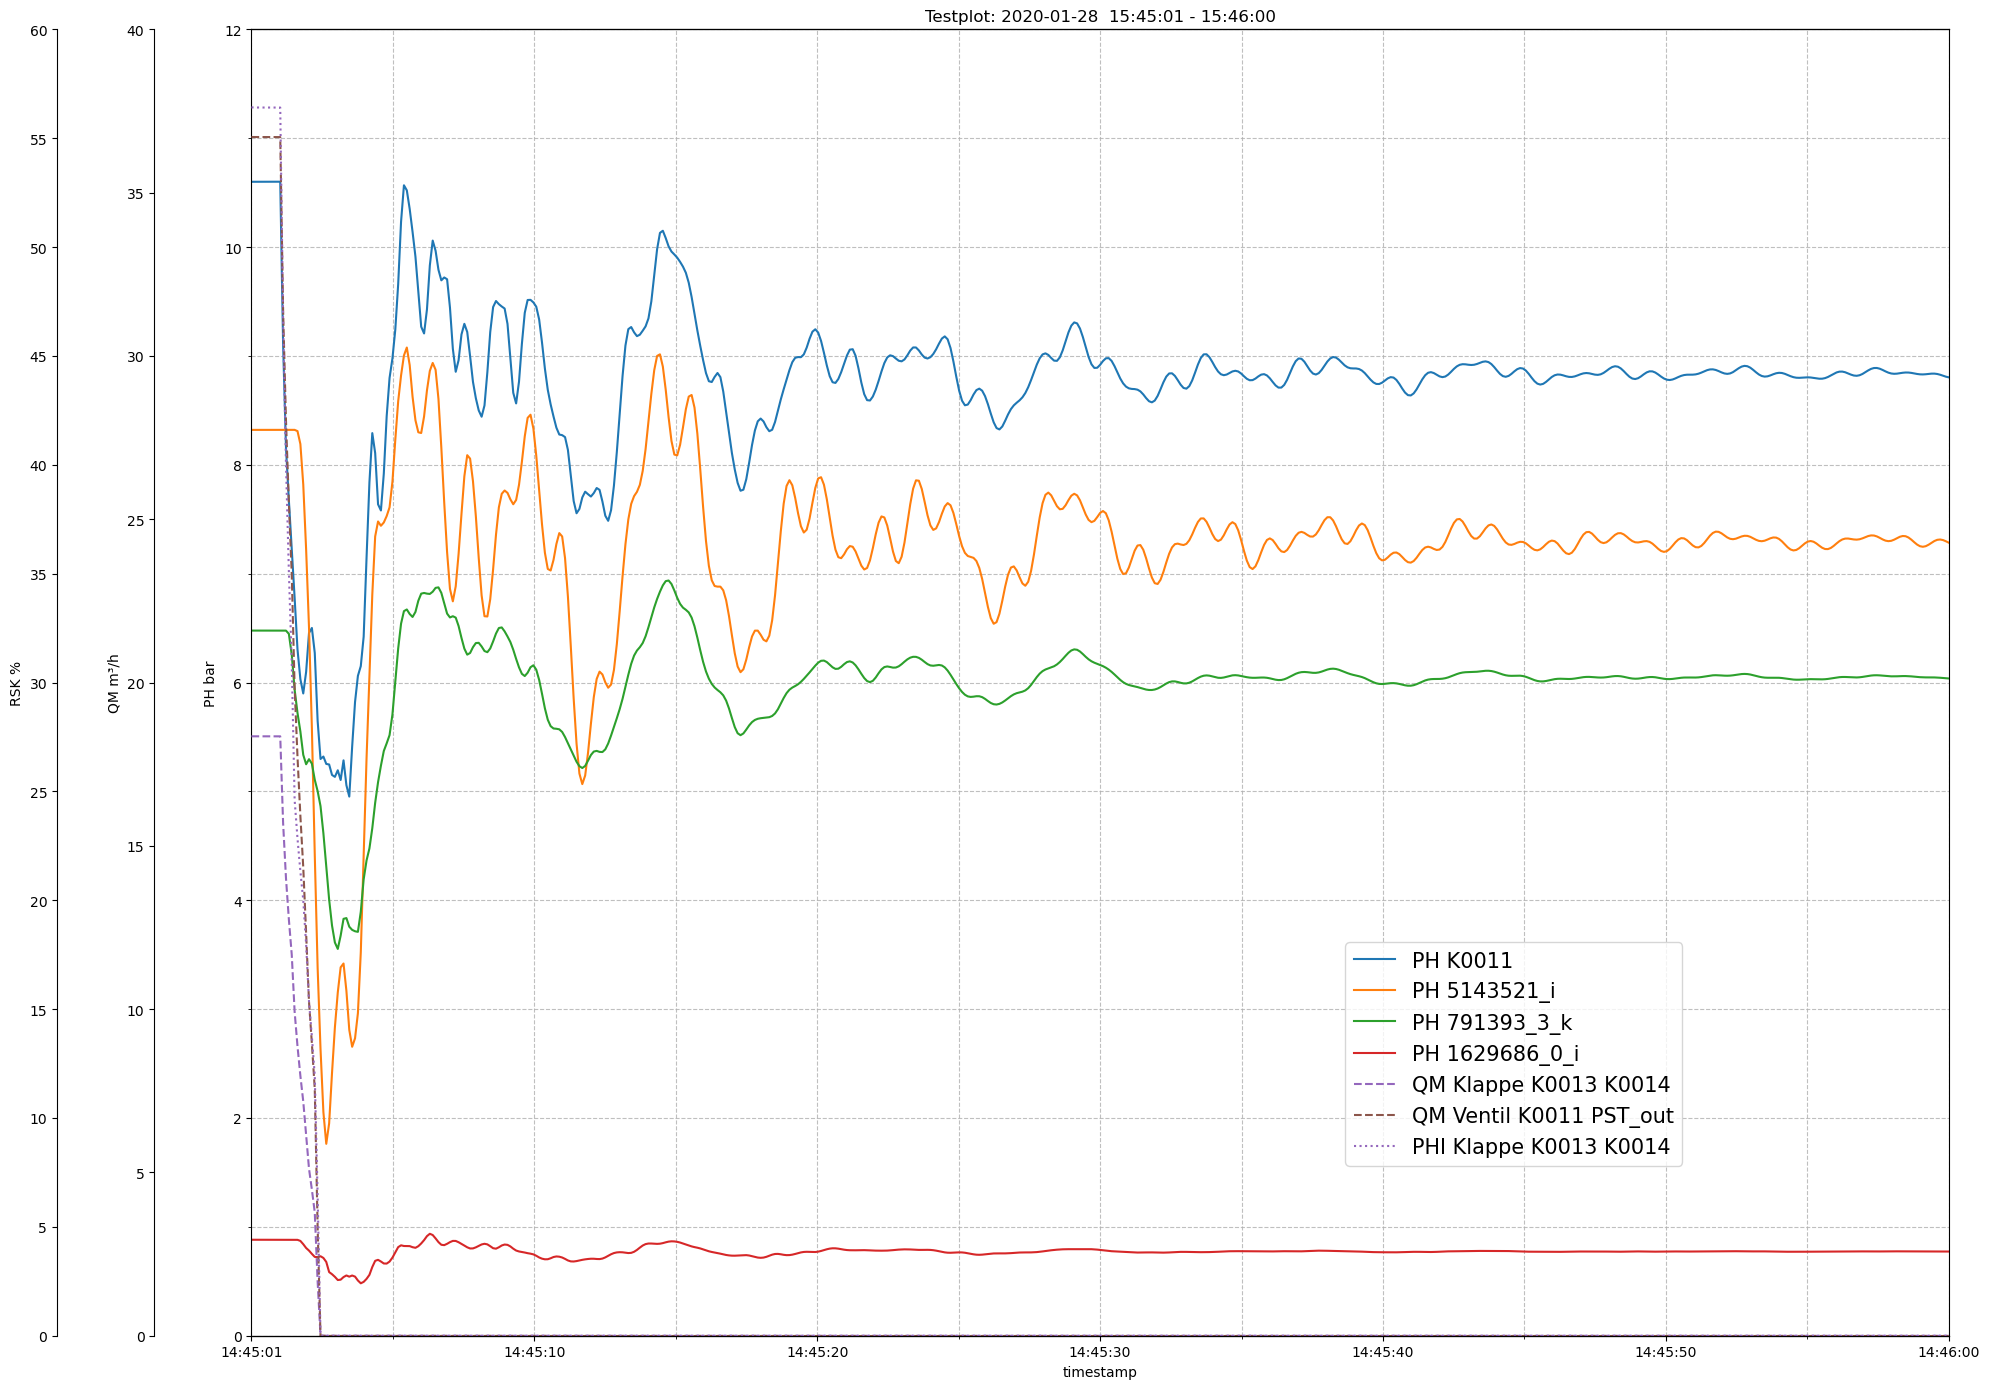

In [23]:
fig, axes, used = s3s.plot_time_curves(
    df=df_results,
    start="2020-01-28 15:45:01.000 +01:00",
    end="2020-01-28 15:46:00.000 +01:00",
    properties=["PH", "QM", "PHI"],
    axis_labels=["PH bar", "QM m³/h", "RSK %"],
    ylims=[(0, 12), (0, 40), (0, 60)],
    tks_per_property=[
        ["5471942051669438823", "5166327497394449628", "5667818255300782920", "5262999985134416180"],
        ["5303247238968995258", "5430537691154258843"],
        ["5303247238968995258"],
    ],

    y_label_ticks=[7, 9, 13],
    y_grid_ticks=13,
    x_label_ticks=7,
    x_grid_ticks=13,

    legend=True,
    legend_in_figure=True,
    legend_loc="upper left",
    legend_coords=(0.67, 0.33),
    legend_fontsize=15,

    title_prefix="Testplot: ",
    show_title=True,

    axis_offset=70,
    linestyles=["-", "--", ":"],
    rotate_xticks=0,

    grid=True,
    grid_style="--",
    grid_alpha=0.8,

    missing="warn",
    logger=None,
)